# Project Title (Topic):_____
#### Group members (Section 003):
##### Cici Liu 77155471
##### Jingyuan Liu 69763183
##### Zefan Liu 17237355
##### Jinyi Wu 28812972

<img src="https://m.media-amazon.com/images/G/15/gc/designs/livepreview/amazon_dkblue_noto_email_v2016_ca-main._CB468775011_.png" />

## Introduction:
Online shopping has been a prevalent behavior worldwide, and how prices and sales volume of online goods are associated with consumer behaviors and profit optimization has also become a popular topic in both economics and machine learning. In particular, with traditional economic models, we may ignore some important lurking information behind the data, such as what dominates the variances between sale information of goods, how these goods are naturally clustered, and how people’s rating on a good affects the discounted price. Insights into these topics may help us reveal the deeper economic pattern of selling and purchasing in online shopping.

This project aims to study the impact of consumer behavior, prices, and sales volume on product sales and profit optimization in online shopping. We choose the ["Amazon Sales Dataset" from Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) data, which contains over 1K+ ratings and reviews for Amazon products listed on the official website of Amazon India. This dataset provides credible and valid data and has very few missing values. It contains a category variable and several useful numerical variables such as discounted price, actual price, rating, and the number of ratings. The dataset provides insight into the online shopping market and consumer behaviors that can help us uncover deep economic patterns in online sales and purchases.

## Preliminary Analysis:

#### Import useful packages, run this cell before proceed!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import patsy
import seaborn as sns
import sklearn
import sklearn.model_selection
import sklearn.ensemble
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection, tree)
warnings.filterwarnings("ignore")
%matplotlib inline

#### Download the [raw data](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) from the web and read in the data by its [URL](https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv) -- this will take a couple seconds.

In [2]:
url = "https://raw.githubusercontent.com/ljy0401/ECON-323-Group-Project/main/amazon.csv"
amazon_raw = pd.read_csv(url)
amazon_raw.info()
amazon_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


#### Data Cleaning
By cleaning the dataset, we remove the columns that are not useful for analysis; we convert all numeric columns from a string type to a float type. Notice that all prices in this dataset are measured in "₹" (Indian rupee). The `discount_percentage` column is scaled to the interval [0,1]. Namely, we obtain the relationship `discounted price` $\approx$ `actual price` $\times$ (1 - `discount_percentage`) (note: this equality may not be exact due to measurement error).

In [113]:
# Remove unnecessary columns
amazon_clean = amazon_raw[['category', 'discounted_price', 'actual_price', 'discount_percentage',
                           'rating', 'rating_count', 'user_id', 'review_title']]
# Type conversions
for col in ["discounted_price", "actual_price", "rating_count"]:
    amazon_clean[col] = amazon_clean[col].str.replace("₹", "")
    amazon_clean[col] = amazon_clean[col].str.replace(",", "")
amazon_clean["discount_percentage"] = amazon_clean["discount_percentage"].str.replace("%", "")
amazon_clean['rating'] = amazon_clean["rating"].str.replace("|", "")

amazon_clean[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]] = amazon_clean[["discounted_price", "actual_price", "discount_percentage", "rating", 
    "rating_count"]].apply(pd.to_numeric, errors='coerce')

amazon_clean['discount_percentage']=amazon_clean['discount_percentage']/100

amazon_clean.info()
amazon_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category             1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1464 non-null   float64
 5   rating_count         1463 non-null   float64
 6   user_id              1465 non-null   object 
 7   review_title         1465 non-null   object 
dtypes: float64(5), object(3)
memory usage: 91.7+ KB


,category,discounted_price,actual_price,discount_percentage,rating,rating_count,user_id,review_title
0,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo..."
1,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go..."
2,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W..."
3,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product..."
4,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second..."


#### Preliminary visualization on the distribution for each numerical column.

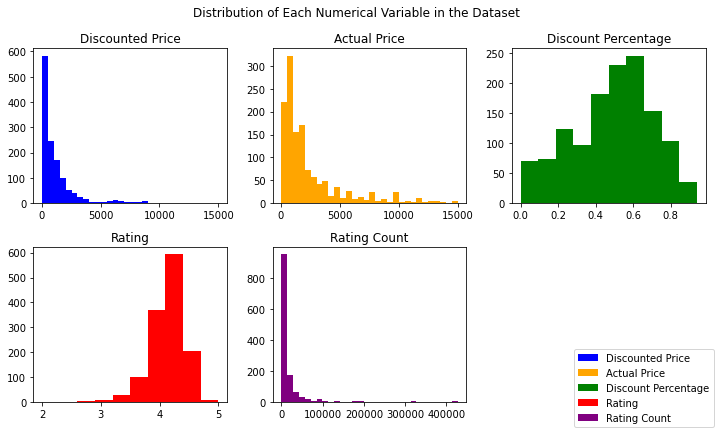

In [109]:
### A first simple visualization on the distribution for each numerical columns.
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs[0, 0].hist(amazon_clean['discounted_price'], color = 'blue', bins=30)
axs[0, 0].set_title('Discounted Price')
axs[0, 1].hist(amazon_clean['actual_price'], color = 'orange', bins=30)
axs[0, 1].set_title('Actual Price')
axs[0, 2].hist(amazon_clean['discount_percentage'], color = 'green')
axs[0, 2].set_title('Discount Percentage')
axs[1, 0].hist(amazon_clean['rating'], color = 'red')
axs[1, 0].set_title('Rating')
axs[1, 1].hist(amazon_clean['rating_count'], color = 'purple', bins=30)
axs[1, 1].set_title('Rating Count')
axs[1, 2].remove()
fig.suptitle('Distribution of Each Numerical Variable in the Dataset')
fig.legend(['Discounted Price', 'Actual Price', 'Discount Percentage', 'Rating', 'Rating Count'], loc='lower right')
plt.tight_layout()
plt.show()

In [25]:
amazon_clean.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096585,18295.541353
std,6944.304394,10874.826864,0.216359,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


Based on the five histograms, we can observe some common features. First of all, the distributions of `Discounted Price`, `Actual Price`, and `Rating Count` are all right-skewed. Most observations fall into the first bar, while very small portions of the observations have relatively large values, which makes the histograms skew to the right.
In specific, the result from the summary table suggests that 75% of discounted price fall below 2000 rupees, 75% of actual price are below 4500 rupees, and 75% of products have fewer than 18,000 reviews (this leads us to choose smaller bin widths of the histograms). 

The `Rating` and `Discount Percentage` plots have a more normal and slightly left-skewed distribution centering around 4.1 points and 50% based on the mean and median from the table, respectively.

##### Missing value

In [45]:
amazon_clean.isnull().sum()

category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
user_id                0
review_title           0
dtype: int64

The `count` row of the summary table suggests that missing values may exist. The above code directly points out that there are at most 3 missing values in our data set. Because of a small number of null values, we will filter out the missing values, which should not have a significant impact on our analytical result.

In our regression model, the response variable is `rating_count`. In our project, we aim to explore the mutual relationship between prices, ratings, and sales volume. Therefore, we consider rating count (the number of ratings) as a decent approximation of the sales volume. However, this assumption may not be entirely suitable in practice since we need to take into account response and non-response biases in online shopping behaviors. For example, customers with stronger opinions on a product tend to rate it online, which will result in those very good and very bad products having more rating counts than those that are just average. 

## Regression

According to the histogram, the distributions of `Discounted Price`, `Actual Price`, and `Rating Count` are highly right-skewed, indicating some extreme outliers in the upper trend may exist in our data. Since it may affect our predictive accuracy, we decide to filter our the outliers before analysis.

In [117]:
count_90_percentile = np.percentile(amazon_clean[amazon_clean.notnull().all(1)]['rating_count'], 90)
discountprice_90_percentile = np.percentile(amazon_clean[amazon_clean.notnull().all(1)]['discounted_price'], 90)
price_90_percentile = np.percentile(amazon_clean[amazon_clean.notnull().all(1)]['actual_price'], 90)

amazon_clean_1 = amazon_clean[amazon_clean['discounted_price'] <= discountprice_90_percentile]
amazon_clean_2 = amazon_clean_1[amazon_clean_1['rating_count'] <= count_90_percentile]
amazon_clean = amazon_clean_2[amazon_clean_2['actual_price'] <= price_90_percentile]

To predict the sales volume, we will first apply the most straightforward model of linear regression, using discount percentage, discounted price, and rating as regressors. We start with the simple regression.

### Simple Regression

#### Train-test split

In [118]:
train = amazon_clean.sample(frac = 0.8,random_state = 323) 
test = amazon_clean.drop(train.index)
y_train = amazon_clean.loc[train.index][amazon_clean.notnull().all(1)]['rating_count']
X_train = amazon_clean.loc[train.index][amazon_clean.notnull().all(1)][['discount_percentage',
                                                                        'discounted_price',
                                                                        'actual_price','rating']]
y_test = amazon_clean.loc[test.index][amazon_clean.notnull().all(1)]['rating_count']
X_test = amazon_clean.loc[test.index][amazon_clean.notnull().all(1)][['discount_percentage',
                                                                      'discounted_price',
                                                                      'actual_price','rating']]
train_data = pd.concat([X_train, y_train],axis=1)
test_data = pd.concat([X_test, y_test],axis=1)

In [119]:
single_lr_model = linear_model.LinearRegression()
single_lr_model.fit(X =X_train[['discount_percentage']], 
             y = y_train)
beta_0_single = single_lr_model.intercept_
beta_1_single = single_lr_model.coef_[0]
print(f"Fit model: rating_count = {beta_0_single} + {beta_1_single} discount_percentage")

Fit model: rating_count = 8253.075091556244 + -1248.5133940567794 discount_percentage


In [120]:
train_mse_lr_single = metrics.mean_squared_error(y_train, single_lr_model.predict(X_train[['discount_percentage']]))
test_mse_lr_single = metrics.mean_squared_error(y_test, single_lr_model.predict(X_test[['discount_percentage']]))

print(f'The MSE on the training data is {train_mse_lr_single}, and the MSE on the testing data is {test_mse_lr_single}.')

The MSE on the training data is 82483260.193584, and the MSE on the testing data is 70443198.25563414.


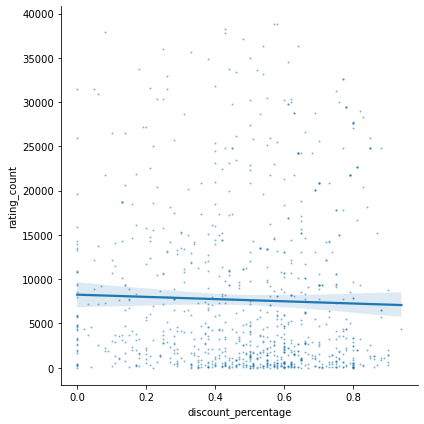

In [121]:
sns.lmplot(
    data=train_data, x="discount_percentage", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

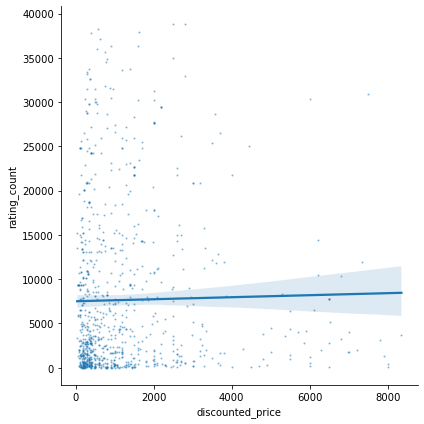

In [123]:
sns.lmplot(
    data=train_data, x="discounted_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

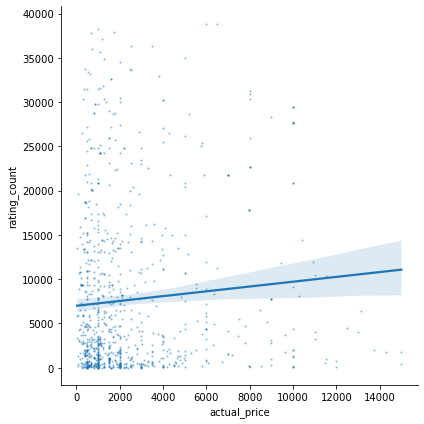

In [124]:
sns.lmplot(
    data=train_data, x="actual_price", y="rating_count", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
)
plt.show()

According to the regression plot and the fitted model equation, 1 percent of increase in percentage point may lead to 1248.5 decrease in sales volume, and 1 rupee increase in actual price or discounted price will induce increase in the sales volume. The result seems to be counter-intuitive and contradicts with the demand-supply economic model. Therefore, we will apply multiple regression in the following to see if any different outcomes may result.

### Multiple Regression

We regress the `rating_count` on all applied explanatory variables `discount_percentage`, `discounted_price`, and `rating`.

In [126]:
multi_lr_model = linear_model.LinearRegression()

multi_lr_model.fit(X = X_train[['discount_percentage', 'discounted_price', 'rating']],
                   y = y_train)
beta_0_multi = multi_lr_model.intercept_
beta_1_multi = multi_lr_model.coef_[0]
beta_2_multi = multi_lr_model.coef_[1]
beta_3_multi = multi_lr_model.coef_[2]

print(f"Fit model: rating_count = {beta_0_multi} + {beta_1_multi:.4f} discount_percentage + {beta_2_multi:.4f} discounted_price + {beta_3_multi:.4f} rating")

Fit model: rating_count = -14513.979822782621 + -58.1340 discount_percentage + 0.0656 discounted_price + 5419.6486 rating


In [134]:
import statsmodels.api as sm

X = X_train[['discount_percentage', 'discounted_price', 'rating']]
y = y_train

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           rating_count   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     9.966
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.81e-06
Time:                        00:29:41   Log-Likelihood:                -9760.3
No. Observations:                 928   AIC:                         1.953e+04
Df Residuals:                     924   BIC:                         1.955e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.451e+04   4

In [140]:
np.corrcoef([[X_train['discount_percentage']],[X_train['discounted_price']],[X_train['rating']]])

ValueError: m has more than 2 dimensions

In [128]:
train_mse_lr_multi = metrics.mean_squared_error(y_train, multi_lr_model.predict(X_train[['discount_percentage', 'discounted_price', 'rating']]))
test_mse_lr_multi = metrics.mean_squared_error(y_test, multi_lr_model.predict(X_test[['discount_percentage', 'discounted_price', 'rating']]))

print(f'The MSE on the training data is {train_mse_lr_multi}, and the MSE on the testing data is {test_mse_lr_multi}.')

The MSE on the training data is 79973723.39472757, and the MSE on the testing data is 68716971.38161089.


The MSE increases from the previous simple regression though in limited degree (training MSE from testing 

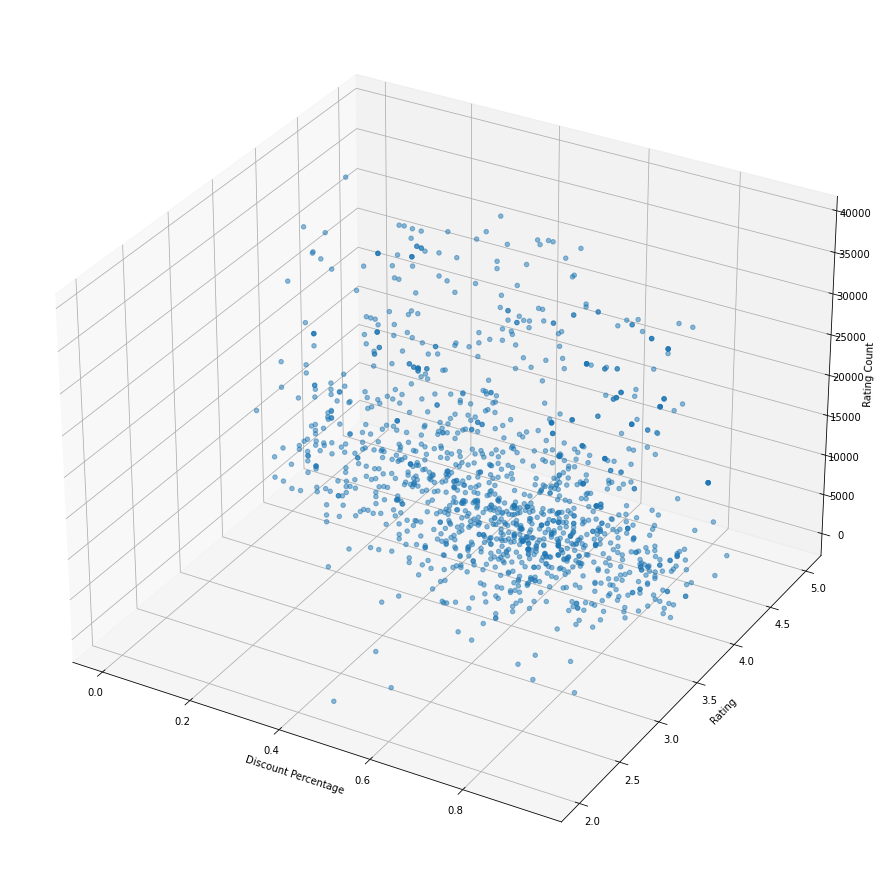

In [77]:
from mpl_toolkits.mplot3d import Axes3D

# Create outcome variable z with explanatory variables x and y
x = amazon_clean['discount_percentage']
y = amazon_clean['rating']
z = amazon_clean['rating_count']

# Fit values using the regression model
fit = beta_0_multi + beta_1_multi*x + beta_2_multi*y

# Create a 3D figure
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as points
ax.scatter(x, y, z, alpha =0.5)

# Plot fitted values
# x_range = np.arange(x.min(), x.max())
# y_range = np.arange(y.min(), y.max())
# X, Y = np.meshgrid(x_range, y_range)
# fit = beta_0_multi + beta_1_multi*X + beta_2_multi*Y
# ax.plot_surface(x, y, fit, alpha=0.5)

# Set the axis labels
ax.set_xlabel('Discount Percentage')
ax.set_ylabel('Rating')
ax.set_zlabel('Rating Count')

# Show the plot
plt.show()

## Implementation & Discussion:_____

## Conclusion:_____

## Reference:

* KARKAVELRAJA J. "Amazon Sales Dataset", Retrieved from [Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) at https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
* QuantEcon. "[Introduction to Economic Modeling and Data Science](https://datascience.quantecon.org/)." https://datascience.quantecon.org/
* [pandas documentation.](https://pandas.pydata.org/pandas-docs/stable/index.html), Jan 19, 2023 Version: 1.5.3, https://pandas.pydata.org/pandas-docs/stable/index.html 
* [Previous project](https://datascience.quantecon.org/theme/projects.html), from https://datascience.quantecon.org/theme/projects.html